In [ ]:
"""
    File : probabilityMicrodiversitySpatialFeatures.ipynb
    Plot : probability density distribution of normalised distance to tumour centre from microdiversity hotspots
    Input : 
        SourceData_ExtendedData_Fig6.xlsx
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path_to_all_source_data = "../Source data for figures"

In [11]:
def read_and_plot(sheet_names):
    def config_ax(ax):
        ax.set_xlim([0,1])
        ax.set_xlabel('Normalised distance to centre')
        ax.set_ylabel('Probability density') 
    def config_font_size(figsize):
        params = {'legend.fontsize': 6,
                  'figure.figsize': figsize,
                 'axes.labelsize': 8,
                 'axes.titlesize': 8,
                 'xtick.labelsize':6,
                 'ytick.labelsize':6,
                 'pdf.fonttype':42}
        plt.rcParams.update(params)
    
    def plot_freq(data, label, color, ax):
        n_bins = 50
        n, bins, patches = ax.hist(
            df_spots.distances, n_bins, density=True, histtype='step',
            cumulative=False, label=label, color = color, lw=0.5,
            range = (0,1)
        )

        return (n, bins, patches)
        
    labels = [
        "S p=2e-4", "S p=6e-4", "S p=1e-3",
        "V p=2e-4", "V p=6e-4", "V p=1e-3",
    ]

    colors = [
        '#FFCCCC', '#FF6666', '#FF0000',
        '#CCCCFF', '#6666FF', '#0000FF'
    ]
    for sheet_name in excelfile.sheet_names:
        
        print(sheet_name)
        
        data = pd.read_excel(
            excelfile, 
            sheet_name=sheet_name,
        )

        fig = plt.figure(dpi=300)
        ax = fig.add_axes([0.2,0.2,0.75,0.75])

        config_font_size(figsize = (4,3))
        config_ax(ax)

        for label, color in zip(
            labels, colors
        ):
            df_spots = data.loc[
                data.label == label,
                ["distances"]
            ]
            plot_info = plot_freq(
                df_spots, 
                label=label, 
                color = color, 
                ax = ax
            )

        plt.legend(loc='upper left')
        plt.show()

# Extended Data Figure 6

In [4]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Extended_Data_Figure_6",
    "SourceData_ExtendedData_Fig6.xlsx"
)

In [5]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataEDFig6a',
 'SourceDataEDFig6b',
 'SourceDataEDFig6c',
 'SourceDataEDFig6d']

SourceDataEDFig6a


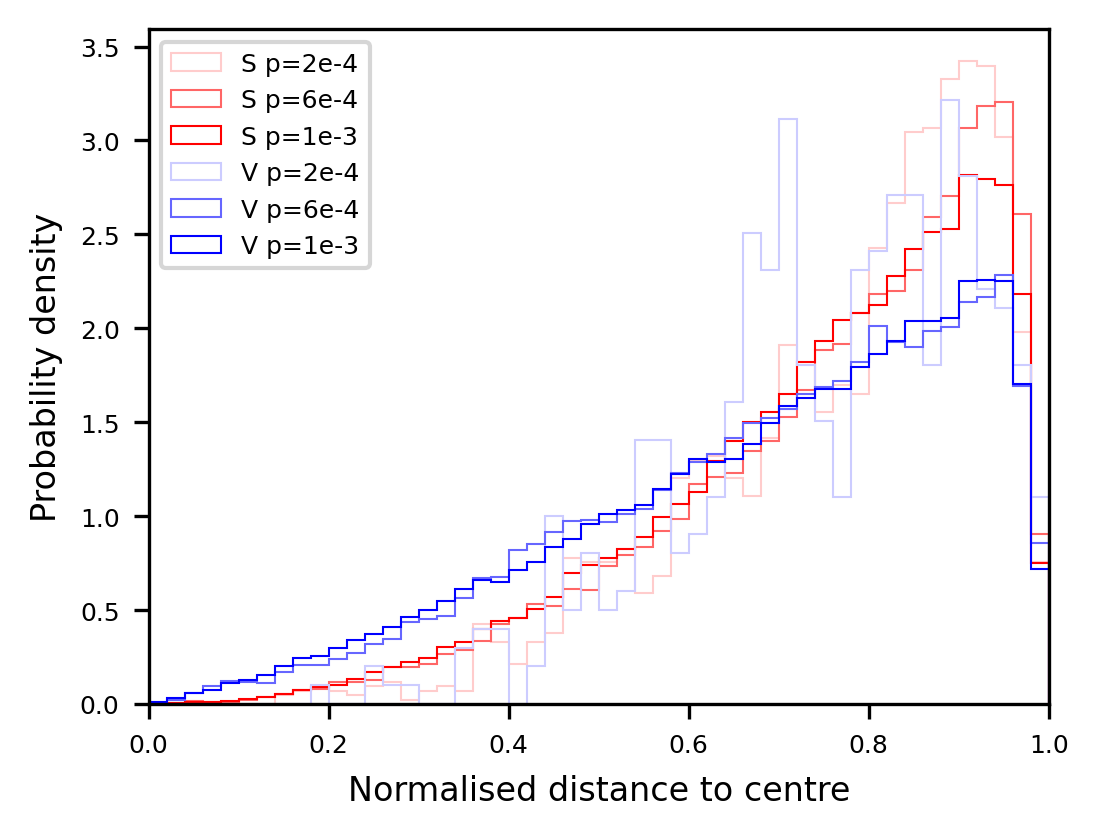

SourceDataEDFig6b


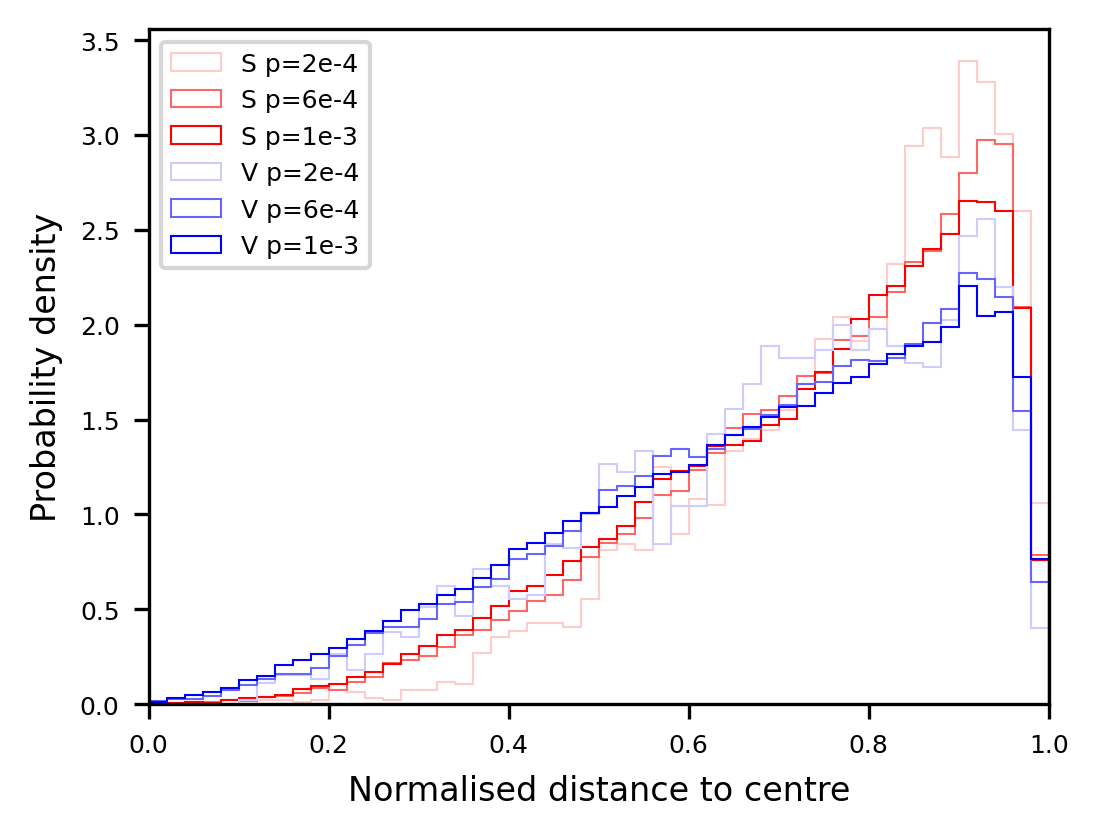

SourceDataEDFig6c


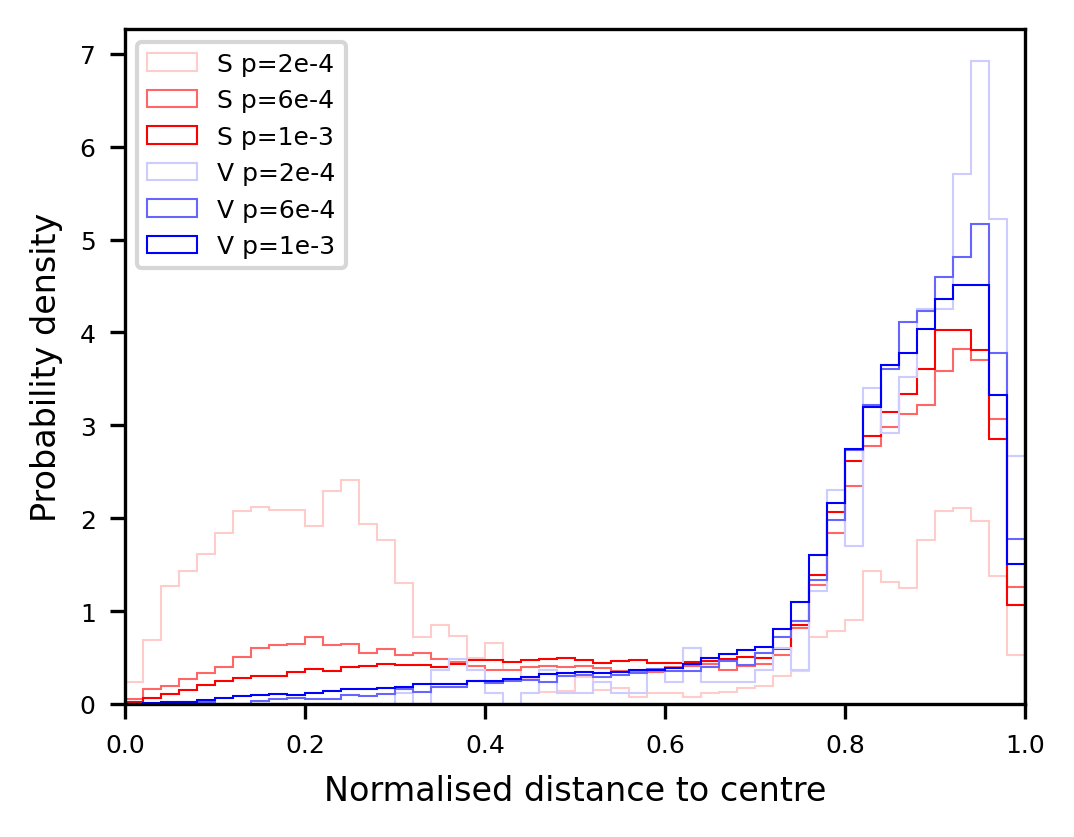

SourceDataEDFig6d


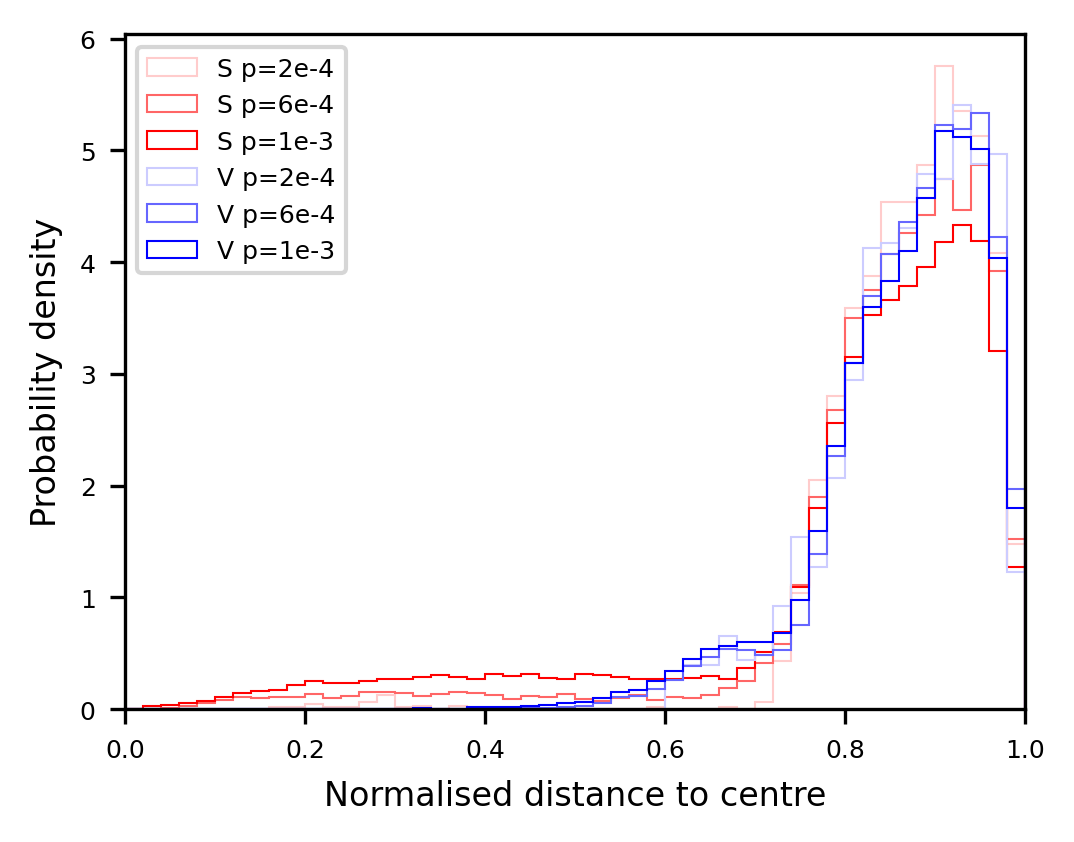

In [12]:
read_and_plot(excelfile.sheet_names)